In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "..")))

In [2]:
from scripts.data_loading import load_x_data
from scripts.data_cleaning import clean_text
from scripts.data_visualization import plot_sentiment_distribution
from scripts.data_cleaning import preprocess_dataframe
from scripts.data_visualization import plot_wordcloud
from scripts.data_visualization import plot_most_frequent_words

[nltk_data] Downloading package stopwords to /home/olana/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/olana/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
file_path = '../data/raw/Twitter_Data.csv'

In [4]:
df = load_x_data(file_path)

In [5]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [7]:
df['clean_text'].isnull().sum()


np.int64(4)

In [8]:
df['category'].isnull().sum()

np.int64(7)

In [9]:
print(df['category'].unique())

[-1.  0.  1. nan]


In [10]:
df = preprocess_dataframe(df)

In [11]:
df['clean_text'].isnull().sum()

np.int64(0)

In [13]:
df['category'] = df['category'].astype(str).str.strip().str.lower()
df = df[(df['category'] != '') & (df['category'] != 'nan')]

In [14]:
df['category'].isnull().sum()

np.int64(0)

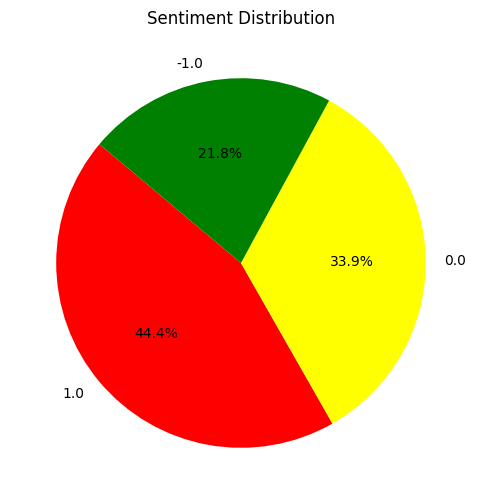

In [15]:
plot_sentiment_distribution(df)

In [16]:
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))
df.groupby('category')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
category,,,,,,,,
-1.0,35508.0,16.720176,7.271514,1.0,11.0,17.0,23.0,42.0
0.0,55141.0,10.203623,6.446479,1.0,5.0,9.0,13.0,42.0
1.0,72244.0,15.922000,7.389067,1.0,10.0,16.0,22.0,43.0


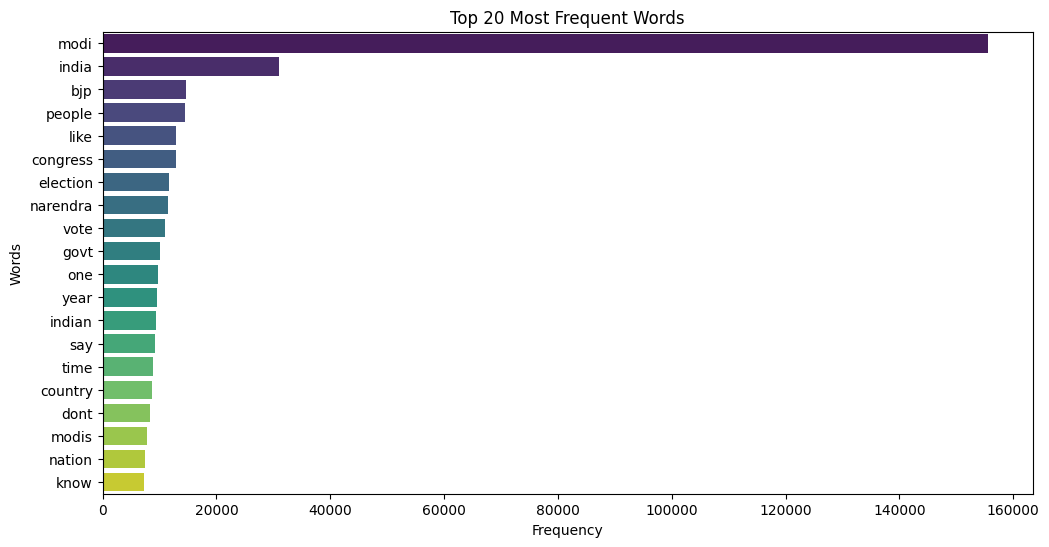

In [17]:
plot_most_frequent_words(df)

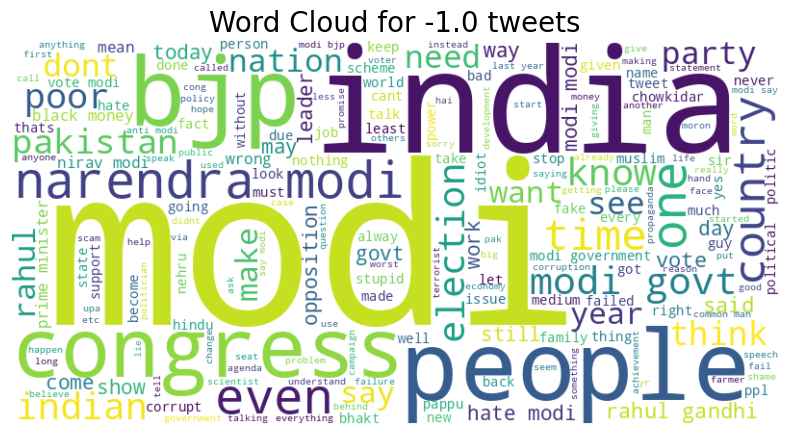

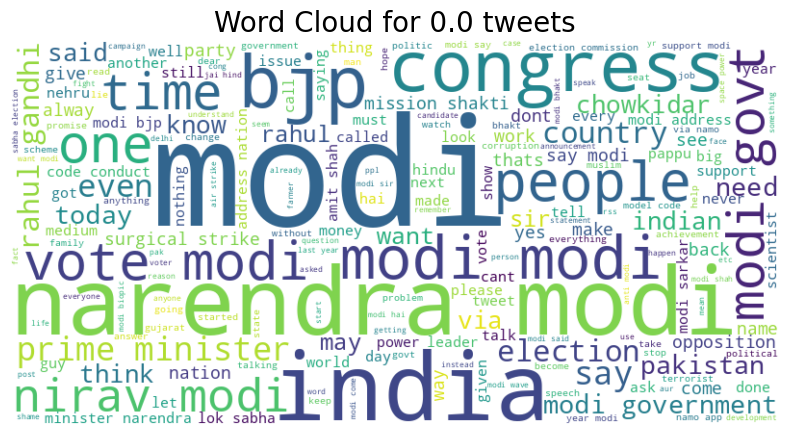

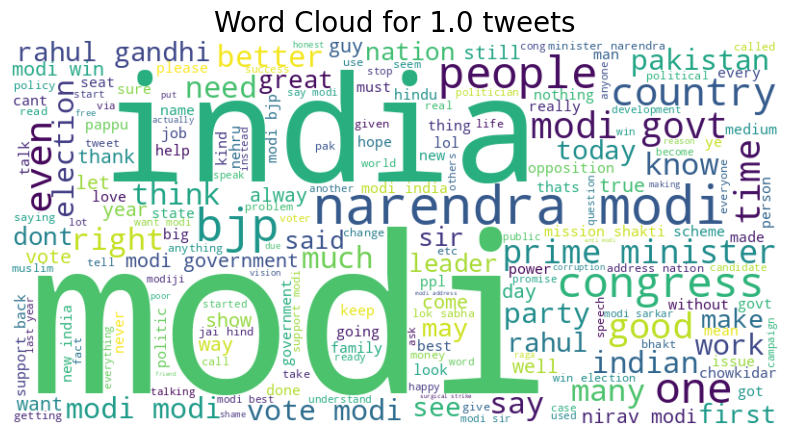

In [18]:
for sentiment in df['category'].unique():
    plot_wordcloud(df[df['category'] == sentiment]['clean_text'], f'Word Cloud for {sentiment} tweets')